<div class='alert alert-info'>
<h1><center><font color='Darkblue'>Board-game-review-prediction<font></center></h1></div>

<div class='alert alert-info'><h1><center><font color='#FF33A1'>Using Random Forest Regressor and HyperParameter Tunining</font></center></h1></div>

        Using This Random Forest Regression and Hyperparametertining we are predicting to get the ratings of each game in a board game

# <font color='Darkblue'>1.Import the Required Libraries</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# <font color='Darkblue'>2.Loading the GameZone Data Set</font>

In [2]:
df=pd.read_csv('games.csv')

In [3]:
df.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [4]:
df.tail()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
81307,184441,boardgameexpansion,Micro Rome: Aegyptus,2015.0,1.0,1.0,0.0,30.0,0.0,10.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81308,184442,boardgame,Trivial Pursuit: Marvel Cinematic Universe Da...,2013.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81309,184443,boardgame,BEARanoia,2015.0,2.0,15.0,1.0,1.0,1.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81310,184449,boardgame,Freight,2015.0,2.0,4.0,60.0,30.0,60.0,8.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81311,184451,boardgame,Bingo Animal Kids,2010.0,1.0,6.0,10.0,10.0,10.0,2.0,0,0.0,0.0,0,0,0,0,0,0,0.0


# <font color='Darkblue'>3.Data Preprocessing<font>


In [5]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81312 entries, 0 to 81311
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    81312 non-null  int64  
 1   type                  81312 non-null  object 
 2   name                  81271 non-null  object 
 3   yearpublished         81309 non-null  float64
 4   minplayers            81309 non-null  float64
 5   maxplayers            81309 non-null  float64
 6   playingtime           81309 non-null  float64
 7   minplaytime           81309 non-null  float64
 8   maxplaytime           81309 non-null  float64
 9   minage                81309 non-null  float64
 10  users_rated           81312 non-null  int64  
 11  average_rating        81312 non-null  float64
 12  bayes_average_rating  81312 non-null  float64
 13  total_owners          81312 non-null  int64  
 14  total_traders         81312 non-null  int64  
 15  total_wanters      

In [6]:

# cheking for null values
df.isnull().sum()

id                       0
type                     0
name                    41
yearpublished            3
minplayers               3
maxplayers               3
playingtime              3
minplaytime              3
maxplaytime              3
minage                   3
users_rated              0
average_rating           0
bayes_average_rating     0
total_owners             0
total_traders            0
total_wanters            0
total_wishers            0
total_comments           0
total_weights            0
average_weight           0
dtype: int64

            Here we have got null values in the columns ,so simply we are removing those null values by using dropna() function

In [7]:
#removing the null values
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

id                      0
type                    0
name                    0
yearpublished           0
minplayers              0
maxplayers              0
playingtime             0
minplaytime             0
maxplaytime             0
minage                  0
users_rated             0
average_rating          0
bayes_average_rating    0
total_owners            0
total_traders           0
total_wanters           0
total_wishers           0
total_comments          0
total_weights           0
average_weight          0
dtype: int64

In [9]:
    # cheking the shape
df.shape

(81268, 20)

In [10]:
df.duplicated().sum()

1849

In [11]:
df=df.drop_duplicates()

In [12]:
df.shape

(79419, 20)

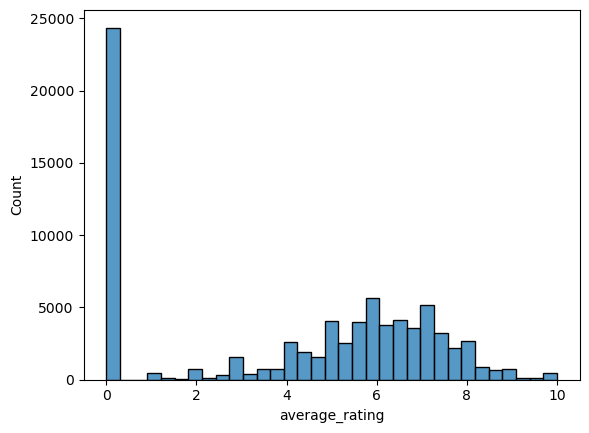

In [13]:
# cheking the dependent variable which is "average_rating" has the equilent classes in their data
sns.histplot(df['average_rating'])
plt.show()

        Here we have seen that the 0 avarage has highest class compared to other classes ,mostly the model will trained on this 0 class because of high data.for this we should apply hyperparameter tuning

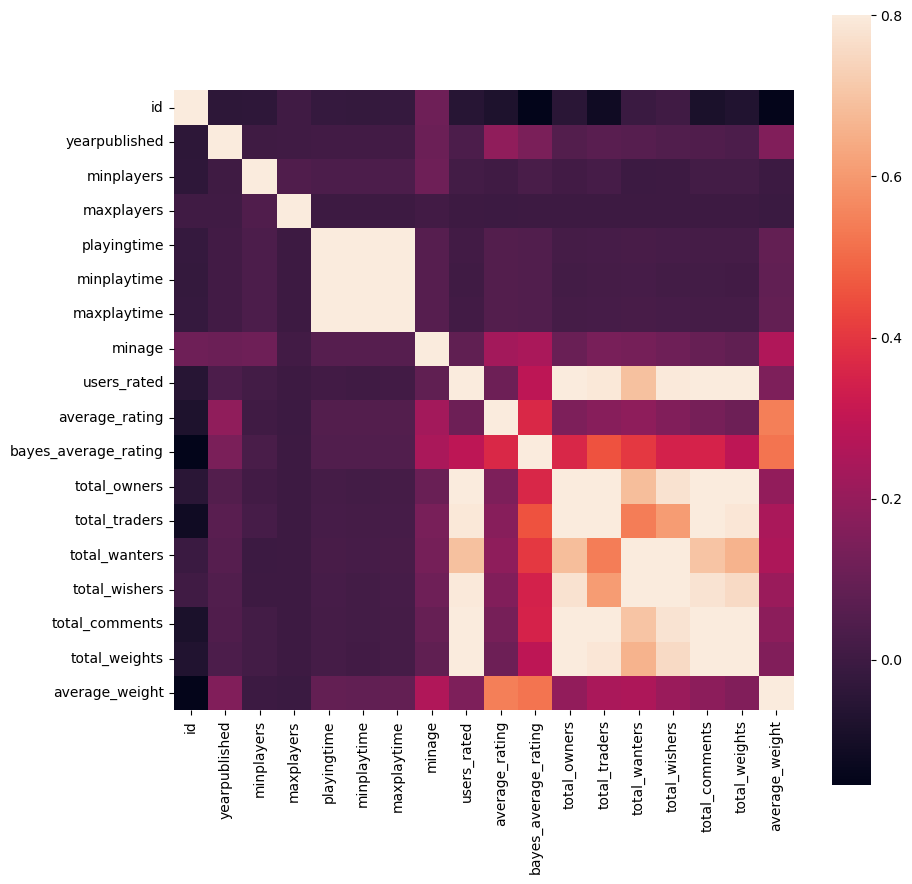

In [14]:
# Correlation between the independent variables and the dependent variables.
correlation=df.select_dtypes(include=['number']).corr()
fig=plt.figure(figsize=(10,10))
sns.heatmap(correlation,vmax=0.8,square=True)
plt.show()

        Here we have seen that correlation between dependent variable and independent variables are highly correlated ,some times it leads to overfitting.

# <font color='Darkblue'>4.Model Evaluation<font>

In [15]:
X=df.iloc[:,[4,5,6,7,8,9,10]].values
Y=df.iloc[:,11].values

In [16]:
Y[10:20]

array([7.9888 , 8.43944, 8.35044, 8.09283, 7.99115, 8.03071, 7.98673,
       8.05776, 7.87047, 7.89829])

# <font color='darkblue'>5.Splitting the data into training and testing <font>

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [18]:
x_train.shape

(63535, 7)

In [19]:
x_test.shape

(15884, 7)

In [20]:
from math import sqrt
sqrt(63535)

252.06150043193824

# <font color='Darkblue'>6.Model Selection and Performing<font>

In [21]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=252,random_state=0)
regressor.fit(x_train,y_train)


RandomForestRegressor(n_estimators=252, random_state=0)

In [22]:
#Predicting the model
y_pred=regressor.predict(x_test)

In [23]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8383587827868888

# <font color='Darkblue'> 7.Improvong the model By performing Cross validation and Hyperparameter tuning<font>

        Cross-validation is a vital technique in machine learning for assessing the performance and robustness of a model. By splitting your data into several subsets, cross-validation helps ensure that the model's performance is consistent and reliable across different data samples. Here's a quick overview:

        K-Fold Cross-Validation: The data is divided into 'k' subsets (folds). The model is trained and evaluated 'k' times, each time using a different fold as the test set and the remaining folds as the training set. This helps reduce variability and gives a better estimate of model performance.

        Using cross-validation can help in selecting the best model and tuning hyperparameters. It provides a comprehensive view of how the model is likely to perform on unseen data, ultimately leading to more generalizable and robust machine learning models

In [24]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor ,X=x_train ,y=y_train , cv=10)#cv checks the cross validation for the 10 times 
accuracies.mean()

0.8363601954890667

In [25]:
accuracies.std()

0.006311687439485701

# <font color='#FF33A1'>Improving the model By using GridSearchCV<font>

        GridSearchCV is a method in scikit-learn used for hyperparameter tuning in machine learning models. It automates the process of finding the best combination of hyperparameters by performing an exhaustive search over a predefined parameter grid.

  ####    How It Works
        1.You define a set of hyperparameters and their possible values.
        2.GridSearchCV trains and evaluates the model for each combination using cross-validation.
        3.It selects the combination that gives the best performance.


In [26]:
from sklearn.model_selection import GridSearchCV
parameters={
    'bootstrap':[True],
    'min_samples_leaf':[3,4,5],
    'min_samples_split':[6,8,10,12],
    'n_estimators':[251,261,271]
}

       1. estimator: The model to be tuned.
       2. param_grid: Dictionary of hyperparameters and their values.
       3. cv: Number of cross-validation folds (default is 5).
       4. scoring: Metric to optimize (e.g., 'accuracy', 'f1', 'roc_auc').
       5. n_jobs: Number of parallel jobs (-1 uses all cores).

In [ ]:
grid = GridSearchCV(estimator = regressor , param_grid = parameters , cv = 10 , n_jobs=-1)
grid = grid.fit(x_train , y_train)


In [ ]:
best_accuracy = grid.best_score_

In [ ]:
best_parameters = grid.best_params_
     

In [ ]:
best_accuracy

In [ ]:
best_parameters